In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datatmsp = pd.read_json('job_全国_Python_2018_05_06.json')
df = pd.DataFrame(data_dict)
df.head()

city company_full_names company_name       create_time  positionId  \
0   北京          人人行科技有限公司     人人行(借贷宝)        2018-05-03     4485685   
1   上海       上海清鹤科技股份有限公司         清鹤科技  2018_05_06 11:28     4524762   
2   北京      北京蚂蜂窝网络科技有限公司          马蜂窝  2018_05_06 01:27     4165288   
3   北京       北京猎户星空科技有限公司         猎户星空  2018_05_07 16:49     4488877   
4   北京       北京优虎商务服务有限公司         老虎证券        2018-05-04     4467387   

  positionName   salary  
0  python开发工程师  15k-30k  
1  Python开发工程师  10k-20k  
2  高级Python工程师  15k-25k  
3    Python工程师  15k-30k  
4  Python开发工程师  20k-40k

In [35]:
#df.to_excel('test.xlsx')

In [332]:
#查看个字段，发现salary有一个为空
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 7 columns):
city                  1725 non-null object
company_full_names    1725 non-null object
company_name          1725 non-null object
create_time           1725 non-null object
positionId            1725 non-null int64
positionName          1725 non-null object
salary                1725 non-null object
dtypes: int64(1), object(6)
memory usage: 94.4+ KB


In [333]:
#数据集positionId是职位id，值唯一，len函数计算出唯一值共1697
len(df.positionId.unique())

1697

In [334]:
#使用drop_duplicates清洗.drop_duplicates函数通过subset参数选择以哪个列为去重基准。
#keep参数则是保留方式，first是保留第一个，删除后余重复值，last还是删除前面，保留最后一个。
#duplicated函数功能类似，但它返回的是布尔值。
df_duplicates = df.drop_duplicates(subset = 'positionId',keep = 'first')
df_duplicates.head(5)

city company_full_names company_name       create_time  positionId  \
0   北京          人人行科技有限公司     人人行(借贷宝)        2018-05-03     4485685   
1   上海       上海清鹤科技股份有限公司         清鹤科技  2018_05_06 11:28     4524762   
2   北京      北京蚂蜂窝网络科技有限公司          马蜂窝  2018_05_06 01:27     4165288   
3   北京       北京猎户星空科技有限公司         猎户星空  2018_05_07 16:49     4488877   
4   北京       北京优虎商务服务有限公司         老虎证券        2018-05-04     4467387   

  positionName   salary  
0  python开发工程师  15k-30k  
1  Python开发工程师  10k-20k  
2  高级Python工程师  15k-25k  
3    Python工程师  15k-30k  
4  Python开发工程师  20k-40k

In [335]:
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 1724
Data columns (total 7 columns):
city                  1697 non-null object
company_full_names    1697 non-null object
company_name          1697 non-null object
create_time           1697 non-null object
positionId            1697 non-null int64
positionName          1697 non-null object
salary                1697 non-null object
dtypes: int64(1), object(6)
memory usage: 106.1+ KB


In [336]:
#salary薪资字段:分薪资上限和薪资下线。薪资分了大小写K、k

def cut_word(word):
    """定义cut_word函数，查找-符号所在位置，并且截取薪资范围开头至K之间的数字，即薪资上限
    """
    position = word.find('-')
    bottomSalary = word[:position-1]
    return bottomSalary

In [337]:
df_duplicates.salary.apply(cut_word)

0       15
1       10
2       15
3       15
4       20
5       10
6       25
7       15
8       15
9        5
10      15
11      15
12       6
13      15
14      20
15      25
16       9
17      35
18      15
19      15
20       5
21       7
22      25
23      11
24      15
25       8
26      15
27      10
28      10
29      10
        ..
1695    25
1696    20
1697     4
1698    20
1699    15
1700    15
1701    15
1702    15
1703    12
1704    10
1705    10
1706    10
1707     5
1708    18
1709    20
1710    10
1711    18
1712     5
1713    20
1714    15
1715    15
1716     4
1717    10
1718    10
1719     4
1720    10
1721    15
1722     4
1723    15
1724     4
Name: salary, Length: 1697, dtype: object

In [338]:
#salary薪资字段:分薪资上限和薪资下线。薪资分了大小写K、k

def cut_word(word):
    """定义cut_word函数，查找-符号所在位置，并且截取薪资范围开头至K之间的数字，即薪资上限
    """
    position = word.find('-')

    if position != -1:
        bottomSalary = word[:position-1]
    else:
        bottomSalary = word[:word.upper().find('K')]
    return bottomSalary
    

In [339]:
#pandas中的apply。它可以针对DataFrame中，既可以作用于一行或者一列的元素，也可以作用于单个元素，允许使用自定义函数。
#apply将cut_word函数应用在salary列的所有行
df_duplicates['bottomSalary'] = df_duplicates.salary.apply(cut_word)


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [340]:
#bottomSalary转换为数字
df_duplicates.bottomSalary.astype('int')

0       15
1       10
2       15
3       15
4       20
5       10
6       25
7       15
8       15
9        5
10      15
11      15
12       6
13      15
14      20
15      25
16       9
17      35
18      15
19      15
20       5
21       7
22      25
23      11
24      15
25       8
26      15
27      10
28      10
29      10
        ..
1695    25
1696    20
1697     4
1698    20
1699    15
1700    15
1701    15
1702    15
1703    12
1704    10
1705    10
1706    10
1707     5
1708    18
1709    20
1710    10
1711    18
1712     5
1713    20
1714    15
1715    15
1716     4
1717    10
1718    10
1719     4
1720    10
1721    15
1722     4
1723    15
1724     4
Name: bottomSalary, Length: 1697, dtype: int32

In [341]:

df_duplicates.head()
# del df_duplicates['bootomSalary']

city company_full_names company_name       create_time  positionId  \
0   北京          人人行科技有限公司     人人行(借贷宝)        2018-05-03     4485685   
1   上海       上海清鹤科技股份有限公司         清鹤科技  2018_05_06 11:28     4524762   
2   北京      北京蚂蜂窝网络科技有限公司          马蜂窝  2018_05_06 01:27     4165288   
3   北京       北京猎户星空科技有限公司         猎户星空  2018_05_07 16:49     4488877   
4   北京       北京优虎商务服务有限公司         老虎证券        2018-05-04     4467387   

  positionName   salary bottomSalary  
0  python开发工程师  15k-30k           15  
1  Python开发工程师  10k-20k           10  
2  高级Python工程师  15k-25k           15  
3    Python工程师  15k-30k           15  
4  Python开发工程师  20k-40k           20

In [342]:

def cut_word(word,method_type):
    """定义cut_word函数，查找-符号所在位置，并且截取薪资范围开头至K之间的数字，即薪资上限
    """
    position = word.find('-')
    length = len(word)
    if position != -1:
        bottomSalary = word[:position-1]
        topSalary = word[position+1:length-1]
    else:
        bottomSalary = word[:word.upper().find('K')]
        topSalary = bottomSalary
    if method_type == 'bottom':
        return bottomSalary
    else :
        return topSalary



df_duplicates['topSalary'] = df_duplicates.salary.apply(cut_word,method_type = 'top')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [343]:
df_duplicates.head()

city company_full_names company_name       create_time  positionId  \
0   北京          人人行科技有限公司     人人行(借贷宝)        2018-05-03     4485685   
1   上海       上海清鹤科技股份有限公司         清鹤科技  2018_05_06 11:28     4524762   
2   北京      北京蚂蜂窝网络科技有限公司          马蜂窝  2018_05_06 01:27     4165288   
3   北京       北京猎户星空科技有限公司         猎户星空  2018_05_07 16:49     4488877   
4   北京       北京优虎商务服务有限公司         老虎证券        2018-05-04     4467387   

  positionName   salary bottomSalary topSalary  
0  python开发工程师  15k-30k           15        30  
1  Python开发工程师  10k-20k           10        20  
2  高级Python工程师  15k-25k           15        25  
3    Python工程师  15k-30k           15        30  
4  Python开发工程师  20k-40k           20        40

In [344]:
#value_counts() 来统计一下每种数据的数量
df_duplicates['create_time'].value_counts()


2018-05-04          409
2018-05-03          283
2018-05-02          268
2018-04-27           62
2018-04-23           51
2018-04-25           50
2018-04-10           39
2018-04-17           38
2018-04-19           37
2018-04-26           37
2018-04-16           36
2018-04-28           32
2018-04-24           32
2018-04-18           26
2018-04-08           25
2018-04-12           21
2018-04-09           20
2018-05-01           19
2018-04-11           17
2018-04-20           14
2018-04-13           12
2018_05_07 10:09      7
2018_05_06 15:02      6
2018-04-07            6
2018-04-14            5
2018_05_07 18:57      4
2018_05_06 17:09      4
2018-04-22            4
2018_05_07 14:39      3
2018_05_07 16:29      3
                   ... 
2018_05_06 11:28      1
2018_05_07 09:16      1
2018_05_07 17:57      1
2018_05_07 16:22      1
2018_05_07 09:51      1
2018-04-15            1
2018_05_07 10:49      1
2018_05_06 10:14      1
2018_05_07 13:11      1
2018_05_07 10:33      1
2018_05_07 17:15

In [345]:
#定义函数：分割销售日期，获取销售日期
#输入：timecolser创建时间这一列，是个series数据类型，输出分割后返回的也是series类型
def splitsaletime(timecolser):
    timelist = []
    for value in timecolser:
        #例如2018-05-07 13:59 分割后为：2018-05-07
        datastr = value.split(' ')[0]
        timelist.append(datastr)
    #将列表转行为一维数据series类型
    timeser = pd.Series(timelist)
    return timeser
#获取创建时间这一列
timeser = df_duplicates.loc[:,'create_time']
#对字符串进行分割获取创建日期
dataser = splitsaletime(timeser)
dataser[0:3]


0    2018-05-03
1    2018_05_06
2    2018_05_06
dtype: object

In [346]:
#修改创建时间这一列的值
df_duplicates.loc[:,'create_time'] = dataser
df_duplicates.head()

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


city company_full_names company_name create_time  positionId positionName  \
0   北京          人人行科技有限公司     人人行(借贷宝)  2018-05-03     4485685  python开发工程师   
1   上海       上海清鹤科技股份有限公司         清鹤科技  2018_05_06     4524762  Python开发工程师   
2   北京      北京蚂蜂窝网络科技有限公司          马蜂窝  2018_05_06     4165288  高级Python工程师   
3   北京       北京猎户星空科技有限公司         猎户星空  2018_05_07     4488877    Python工程师   
4   北京       北京优虎商务服务有限公司         老虎证券  2018-05-04     4467387  Python开发工程师   

    salary bottomSalary topSalary  
0  15k-30k           15        30  
1  10k-20k           10        20  
2  15k-25k           15        25  
3  15k-30k           15        30  
4  20k-40k           20        40

In [347]:
df_duplicates['create_time'] = df_duplicates['create_time'].str.replace("_","-")
df_duplicates.head()


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


city company_full_names company_name create_time  positionId positionName  \
0   北京          人人行科技有限公司     人人行(借贷宝)  2018-05-03     4485685  python开发工程师   
1   上海       上海清鹤科技股份有限公司         清鹤科技  2018-05-06     4524762  Python开发工程师   
2   北京      北京蚂蜂窝网络科技有限公司          马蜂窝  2018-05-06     4165288  高级Python工程师   
3   北京       北京猎户星空科技有限公司         猎户星空  2018-05-07     4488877    Python工程师   
4   北京       北京优虎商务服务有限公司         老虎证券  2018-05-04     4467387  Python开发工程师   

    salary bottomSalary topSalary  
0  15k-30k           15        30  
1  10k-20k           10        20  
2  15k-25k           15        25  
3  15k-30k           15        30  
4  20k-40k           20        40

In [348]:
#把字母变成大写
df_duplicates['positionName'].str.upper()


0                       PYTHON开发工程师
1                       PYTHON开发工程师
2                       高级PYTHON工程师
3                         PYTHON工程师
4                       PYTHON开发工程师
5                      PYTHON 开发工程师
6                       PYTHON高级工程师
7                      PYTHON 开发工程师
8                       PYTHON研发工程师
9                       PYTHON研发工程师
10                      PYTHON开发工程师
11                        PYTHON工程师
12                        PYTHON工程师
13                      PYTHON研发工程师
14                      PYTHON开发工程师
15                     PYTHON 开发工程师
16                         PYTHON开发
17          服务端高级开发工程师GOLANG/PYTHON
18                      PYTHON开发工程师
19                      PYTHON开发工程师
20                      PYTHON开发工程师
21                      PYTHON软件工程师
22                      PYTHON开发工程师
23                      PYTHON开发工程师
24                           PYTHON
25                           PYTHON
26                      PYTHON开发工程司
27                      PYTH

In [349]:
def get_positiontitle(title):
    word = title.find('高级')
    word2 = title.find('实习')
    if word>=0:
        positiontitle = '高级'
    elif word2>=0:
        positiontitle = '实习'
    else:
        positiontitle = '普通'
    return  positiontitle


In [350]:
df_duplicates['positiontitle'] = df_duplicates.positionName.apply(get_positiontitle)
df_duplicates.head()


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


city company_full_names company_name create_time  positionId positionName  \
0   北京          人人行科技有限公司     人人行(借贷宝)  2018-05-03     4485685  python开发工程师   
1   上海       上海清鹤科技股份有限公司         清鹤科技  2018-05-06     4524762  Python开发工程师   
2   北京      北京蚂蜂窝网络科技有限公司          马蜂窝  2018-05-06     4165288  高级Python工程师   
3   北京       北京猎户星空科技有限公司         猎户星空  2018-05-07     4488877    Python工程师   
4   北京       北京优虎商务服务有限公司         老虎证券  2018-05-04     4467387  Python开发工程师   

    salary bottomSalary topSalary positiontitle  
0  15k-30k           15        30            普通  
1  10k-20k           10        20            普通  
2  15k-25k           15        25            高级  
3  15k-30k           15        30            普通  
4  20k-40k           20        40            普通

In [351]:
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 1724
Data columns (total 10 columns):
city                  1697 non-null object
company_full_names    1697 non-null object
company_name          1697 non-null object
create_time           1669 non-null object
positionId            1697 non-null int64
positionName          1697 non-null object
salary                1697 non-null object
bottomSalary          1697 non-null object
topSalary             1697 non-null object
positiontitle         1697 non-null object
dtypes: int64(1), object(9)
memory usage: 225.8+ KB


In [353]:
df_duplicates['bottomSalary'] = df_duplicates['bottomSalary'].astype(np.int)
df_duplicates['topSalary'] = df_duplicates['topSalary'].astype(np.int)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [354]:
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 1724
Data columns (total 10 columns):
city                  1697 non-null object
company_full_names    1697 non-null object
company_name          1697 non-null object
create_time           1669 non-null object
positionId            1697 non-null int64
positionName          1697 non-null object
salary                1697 non-null object
bottomSalary          1697 non-null int32
topSalary             1697 non-null int32
positiontitle         1697 non-null object
dtypes: int32(2), int64(1), object(7)
memory usage: 212.6+ KB


In [355]:
df_duplicates['bottomSalary'] = df_duplicates['bottomSalary']*1000
df_duplicates['topSalary'] = df_duplicates['topSalary']*1000

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [356]:
df_duplicates.head()

city company_full_names company_name create_time  positionId positionName  \
0   北京          人人行科技有限公司     人人行(借贷宝)  2018-05-03     4485685  python开发工程师   
1   上海       上海清鹤科技股份有限公司         清鹤科技  2018-05-06     4524762  Python开发工程师   
2   北京      北京蚂蜂窝网络科技有限公司          马蜂窝  2018-05-06     4165288  高级Python工程师   
3   北京       北京猎户星空科技有限公司         猎户星空  2018-05-07     4488877    Python工程师   
4   北京       北京优虎商务服务有限公司         老虎证券  2018-05-04     4467387  Python开发工程师   

    salary  bottomSalary  topSalary positiontitle  
0  15k-30k         15000      30000            普通  
1  10k-20k         10000      20000            普通  
2  15k-25k         15000      25000            高级  
3  15k-30k         15000      30000            普通  
4  20k-40k         20000      40000            普通

In [485]:
df_duplicates.to_csv('job_clean.csv')

In [382]:
df_duplicates['bottomSalary'].describe()

count     1697.000000
mean     13035.356511
std       5834.787035
min       1000.000000
25%       8000.000000
50%      13000.000000
75%      15000.000000
max      40000.000000
Name: bottomSalary, dtype: float64

In [383]:
#列出薪资前5大城市
df2 = df_duplicates.sort_values(['bottomSalary'],ascending=False)
df2.head(5)



city company_full_names company_name create_time  positionId  \
1522   深圳       厦门笨鸟电子商务有限公司         笨鸟社交  2018-05-07     4049901   
653    上海       上海互趣网络科技有限公司        Amino  2018-04-27     4121644   
1473   北京   飞维美地信息技术（北京）有限公司    FreeWheel  2018-05-04     4291340   
1385   北京    北京世纪好未来教育科技有限公司          好未来  2018-04-27     3984845   
17     北京       北京三快在线科技有限公司         美团点评  2018-05-06     4134091   

                   positionName   salary  bottomSalary  topSalary  \
1522              高级Python爬虫工程师  40k-60k         40000      60000   
653          Java/Python资深开发工程师  35k-70k         35000      70000   
1473  Lead Python/Java Engineer  35k-44k         35000      44000   
1385                Python后端架构师  35k-70k         35000      70000   
17      服务端高级开发工程师Golang/Python  35k-45k         35000      45000   

     positiontitle  
1522            高级  
653             普通  
1473            普通  
1385            普通  
17              高级

In [373]:
#列出薪资后5大城市
df2.tail(5)

city company_full_names company_name create_time  positionId  \
1638   广州      广州市淦源文化传播有限公司      GANcube  2018-05-04     4410374   
1373   上海         斯干网络科技有限公司           斯干  2018-05-03     4116194   
1306   杭州       杭州昇星网络科技有限公司         昇星网络  2018-05-03     3837485   
1636   长沙       福州兜乐网络科技有限公司         兜乐科技  2018-04-10     3983406   
1617   北京       中国科学院计算技术研究所       中科院计算所  2018-05-04     4396219   

                   positionName salary  bottomSalary  topSalary positiontitle  
1638      后端开发实习生（PHP、PYTHON后端）  2k-4k          2000       4000            实习  
1373                  Python实习生  2k-4k          2000       4000            实习  
1306            Python算法工程师（实习）  2k-4k          2000       4000            实习  
1636  C PHP Python node.js实习生新手  2k-4k          2000       4000            实习  
1617                   python爬虫  1K-2K          1000       2000            普通

In [393]:
#列出Python的岗位有多少种
counts = df2['positiontitle'].value_counts()
print(counts)

普通    1349
高级     278
实习      70
Name: positiontitle, dtype: int64


In [419]:
#列出Python职位需求最多的城市
result = pd.pivot_table(df2[['city','positiontitle']],index=['city'],columns=['positiontitle'],aggfunc=[len],fill_value=0,margins=True,margins_name='岗位数量')
result.head()

len               
positiontitle  实习   普通   高级 岗位数量
city                            
上海             10  219   47  276
东莞              0    2    0    2
北京             30  484  143  657
南京              1   24    2   27
南宁              1    2    0    3

In [421]:
result.sort_values(by=('len','岗位数量'),ascending=False,inplace=True)
result.head()

len                 
positiontitle  实习    普通   高级  岗位数量
city                              
岗位数量           70  1349  278  1697
北京             30   484  143   657
上海             10   219   47   276
深圳              1   213   38   252
广州              6    81   10    97

In [424]:
df2.head()

city company_full_names company_name create_time  positionId  \
1522   深圳       厦门笨鸟电子商务有限公司         笨鸟社交  2018-05-07     4049901   
653    上海       上海互趣网络科技有限公司        Amino  2018-04-27     4121644   
1473   北京   飞维美地信息技术（北京）有限公司    FreeWheel  2018-05-04     4291340   
1385   北京    北京世纪好未来教育科技有限公司          好未来  2018-04-27     3984845   
17     北京       北京三快在线科技有限公司         美团点评  2018-05-06     4134091   

                   positionName   salary  bottomSalary  topSalary  \
1522              高级Python爬虫工程师  40k-60k         40000      60000   
653          Java/Python资深开发工程师  35k-70k         35000      70000   
1473  Lead Python/Java Engineer  35k-44k         35000      44000   
1385                Python后端架构师  35k-70k         35000      70000   
17      服务端高级开发工程师Golang/Python  35k-45k         35000      45000   

     positiontitle  
1522            高级  
653             普通  
1473            普通  
1385            普通  
17              高级

In [479]:
#城市和薪资的关系(求最低工资平均值)
result2 = df2.groupby(['city'],as_index = False)['bottomSalary'].mean()
result2.sort_values(by=('bottomSalary'),ascending=False,inplace=True)
result3 = result2.head(10)

result3.rename(columns={'city':'城市','bottomSalary':'平均薪资'},inplace = True)
result3.head()

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


城市          平均薪资
2   北京  15659.056317
0   上海  13829.710145
22  深圳  13091.269841
34  青岛  12500.000000
18  杭州  12466.666667

In [483]:
result3 = result3.set_index('城市')


KeyError: '城市'

In [443]:
#解决乱码获取路径
import matplotlib
matplotlib.matplotlib_fname()

'E:\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

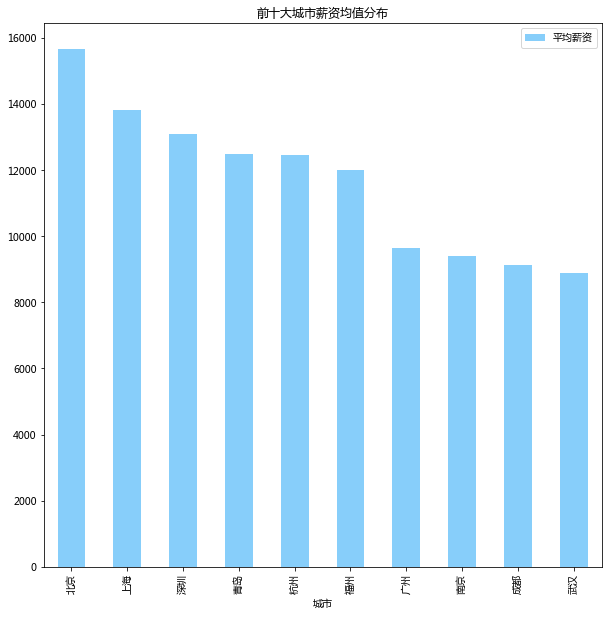

In [482]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
mpl.rcParams['axes.unicode_minus'] = False  
plt = result3.plot(kind='bar',title='前十大城市薪资均值分布',figsize=(10,10),color="#87CEFA")
